# Matplotlib: Data Visualization

## Basic plots

In [91]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

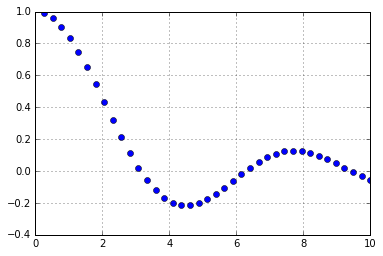

In [92]:
x = np.linspace(0, 10, 40)
sinc = np.sin(x)/x

plt.plot(x, sinc, 'o')
plt.grid()
plt.show()

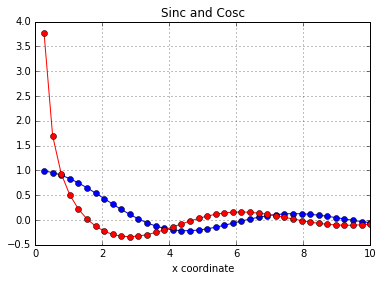

In [93]:
cosc = np.cos(x)/x
plt.plot(x, sinc, "-b", x, sinc, "ob", x, cosc, "-r", x, cosc, "or")
plt.xlabel('x coordinate')
plt.title('Sinc and Cosc')
plt.grid()
plt.show()

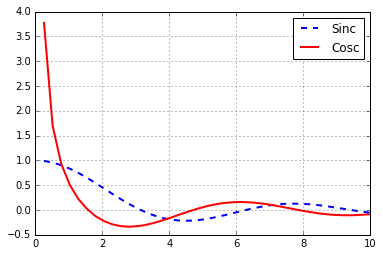

In [94]:
plt.plot(x, sinc, label = 'Sinc', color = 'blue', linestyle = '--' , linewidth = 2)
plt.plot(x, cosc, label = 'Cosc', color = 'red', linestyle = '-' , linewidth = 2)
plt.legend()
plt.grid()
plt.show()

## Scatter (2D) Plot

In [95]:
import pandas as pd
url = 'https://raw.githubusercontent.com/neurospin/pystatsml/master/datasets/salary_table.csv'
salary = pd.read_csv(url) 
df = salary

## Simple scatter (colors)

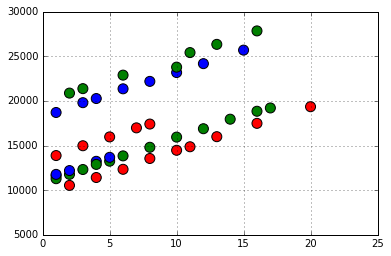

In [96]:
colors = colors_edu = {'Bachelor':'r', 'Master':'g', 'Ph.D':'blue'}
plt.scatter(df['experience'], df['salary'], c = df['education'].apply(lambda x:colors[x]), s = 100)
plt.grid()

## Scatter plot with colors and symbols

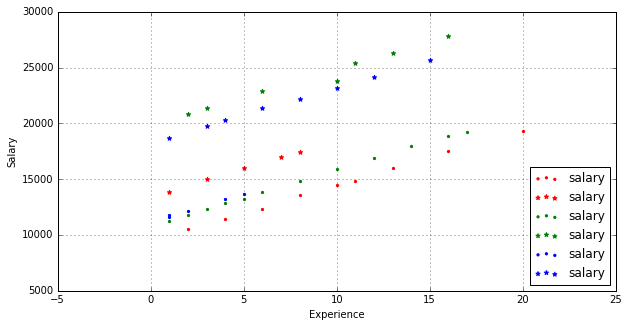

In [97]:
# Set figure size 
plt.figure(figsize = (10,5))

# Colors and symbols
symbols_manag = dict(Y = '*', N ='.')
colors_edu = {'Bachelor':'r', 'Master':'g', 'Ph.D':'blue'}

# Grouped by education and management
for values, d in salary.groupby(['education','management']):
    edu, manager = values
    plt.scatter(d['experience'], d['salary'], marker = symbols_manag[manager], color = colors_edu[edu])

# Labels    
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.legend(loc = 4)
plt.grid()
plt.show()

## Saving figures

In [98]:
'''
# Bitmap format
plt.plot(x, sin)
plt.savefig("sin.png")
plt.close()

# Vectorial format
plt.plot(x, sin)
plt.savefig("sin.svg")
plt.close()

# pdf format
plt.plot(x, sin)
plt.savefig("sin.pdf")
plt.close()
'''

'\n# Bitmap format\nplt.plot(x, sin)\nplt.savefig("sin.png")\nplt.close()\n\n# Vectorial format\nplt.plot(x, sin)\nplt.savefig("sin.svg")\nplt.close()\n\n# pdf format\nplt.plot(x, sin)\nplt.savefig("sin.pdf")\nplt.close()\n'

## Exploring data (Seaborn)

### Boxplot

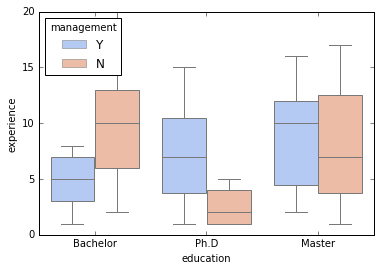

In [115]:
import seaborn as sns

sns.boxplot(x = 'education', y = 'experience', hue = 'management', data = salary, palette = "coolwarm")

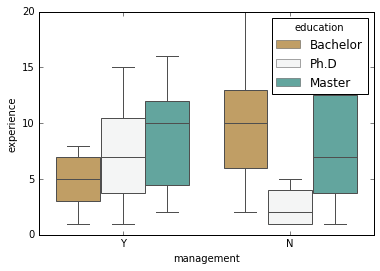

In [113]:
sns.boxplot(x = 'management', y = 'experience', hue = 'education', data = salary, palette = 'BrBG')

## Density plot with 1 figure (multiple axes)

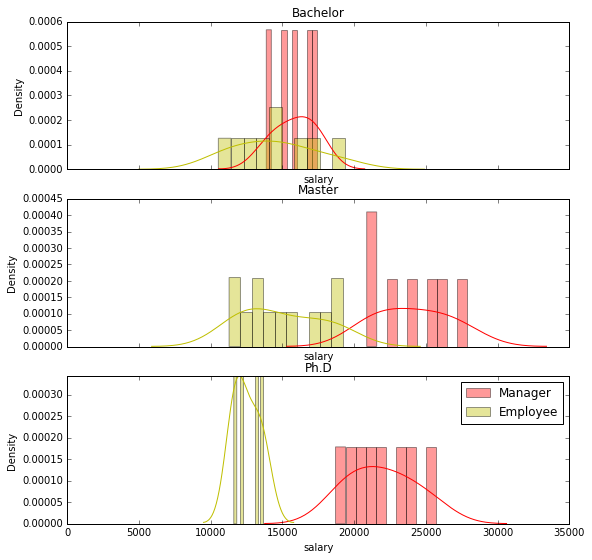

In [122]:
# Intial set-up 

f, axes = plt.subplots(3, 1, figsize = (9,9), sharex = True)

i = 0 
for edu, d in salary.groupby(['education']):
    sns.distplot(d.salary[d.management == 'Y'], color = 'r', bins = 10, label = 'Manager', ax = axes[i])
    sns.distplot(d.salary[d.management == 'N'], color = 'y', bins = 10, label = 'Employee', ax = axes[i])
    axes[i].set_title(edu)
    axes[i].set_ylabel('Density')
    i += 1
plt.legend()

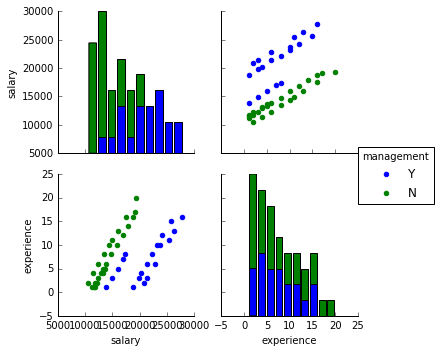

In [121]:
g = sns.PairGrid(salary, hue='management')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()